# **Plotting Residuals**

This notebook explains how to plot residuals as time increases. First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
output = "./output/"
!mkdir -p output

## **1. Set Related Variables in Accordance with the Case Data**

In order to simulate the case for various conditions, we need to set related variables (e.g. model name, yplus, and residual limits). Particularly, *'yp'* and *'res_list'* should be lists, and therefore we can delineate all the related graph in one jupyter notebook. The list *'res_list'* contains all the different limit residuals for **SIMPLE** residual control.

In [2]:
model = "kOmegaSST"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-3', '1e-4', '1e-5', '1e-6']

## **2. Load Data**
\*.*csv* files that were created during simulation are loaded to python. For this case, we need to calculate with various residual limits and yp values, and hence *'solverInfo_path'* should be a list that contains each residual limit value for each yp. In addition, *'.head()'* is used for checking top 5 rows and all columns are well divided.

In [3]:
solverInfo_path = [run + 'turbulentFlatPlate/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.053771,2,1.000000,0.081481,1,False,GAMG,1.000000,0.092806,12,True
1,2,smoothSolver,0.104877,0.006483,4,0.160449,0.007522,2,False,GAMG,0.002922,0.000256,5,True
2,3,smoothSolver,0.043876,0.002967,5,0.088433,0.004925,2,False,GAMG,0.005045,0.000377,5,True
3,4,smoothSolver,0.027401,0.002356,5,0.057707,0.003399,2,False,GAMG,0.006723,0.000556,3,True
4,5,smoothSolver,0.020317,0.001963,5,0.045814,0.002459,2,False,GAMG,0.007603,0.000578,4,True


## **3. Import of Initial Residual for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'***

In \*.*csv* files of *'solverInfo'*, all the residuals for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'* are already calculated. Therefore, these values need to be imported to python. All the values should be lists as they are calculated for various **SIMPLE** residual limits.

In [4]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## **4. Plot**

All the initial residuals are plotted as the time step increases. Since observing of convergence behavior is the purpose of this notebook, it would be better that graphs are separated by each **SIMPLE** residual limits, unlike plotting skin friction.

<ipython-input-5-4a580081cd6e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(8, 3))


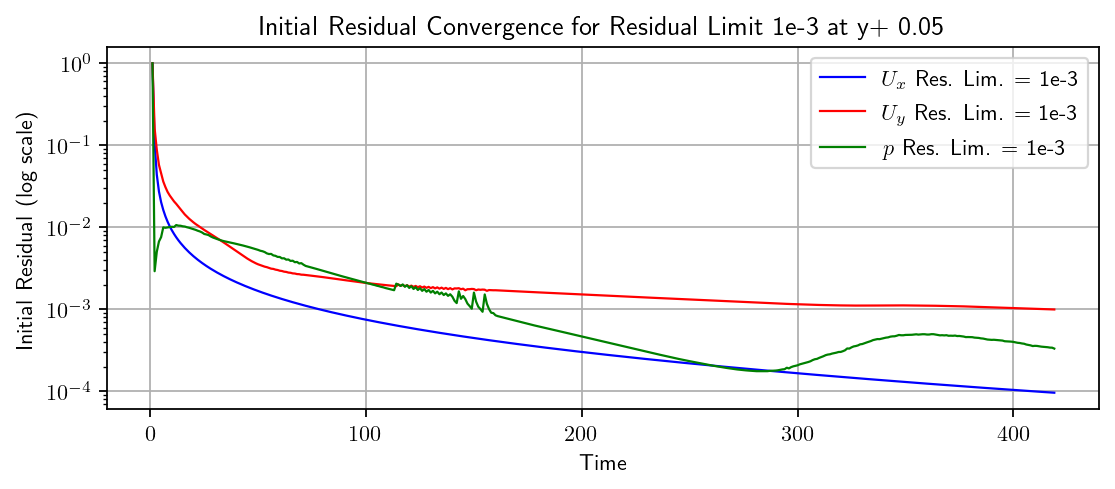

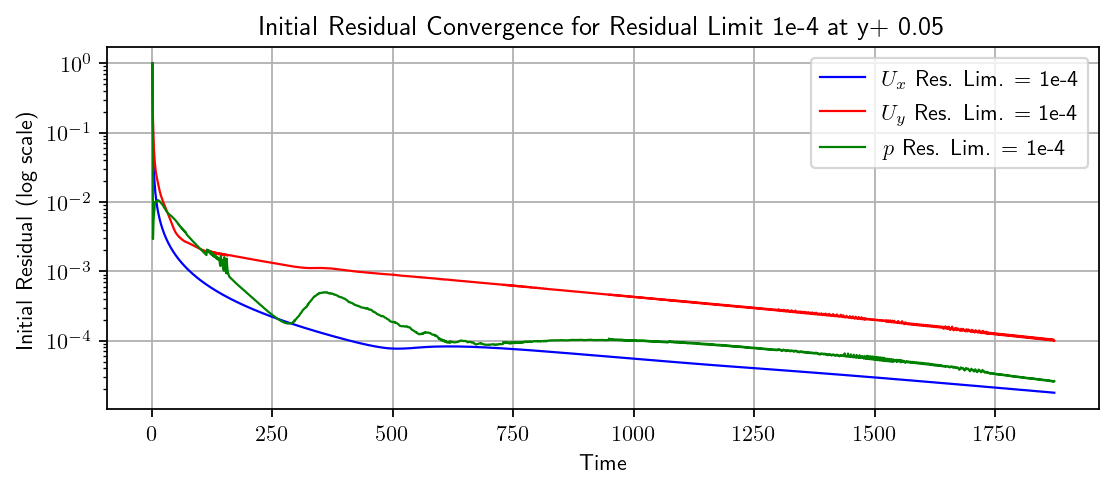

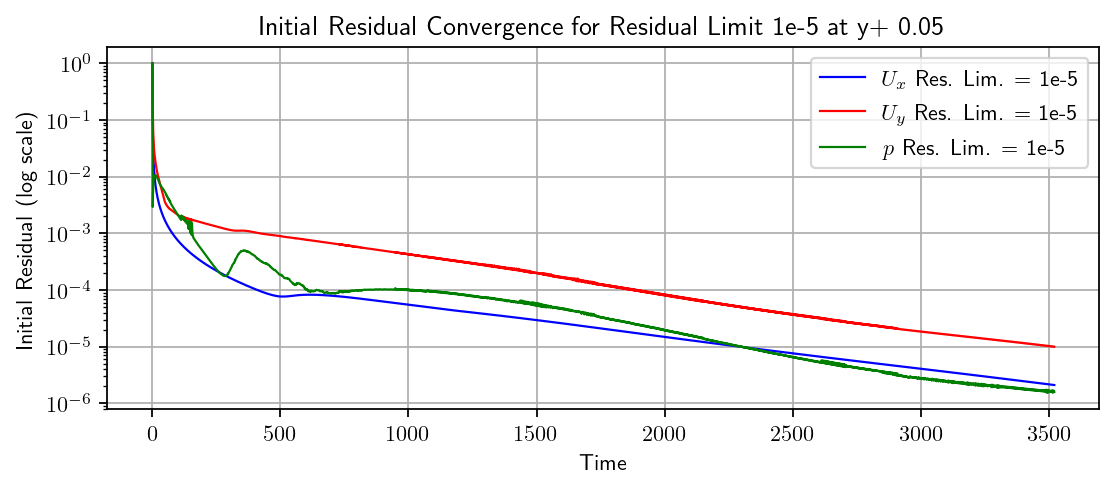

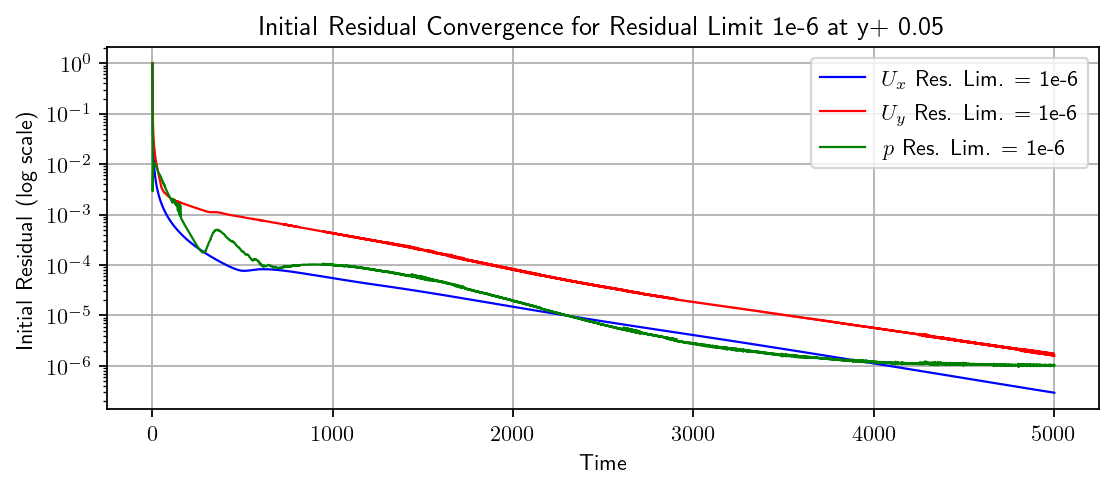

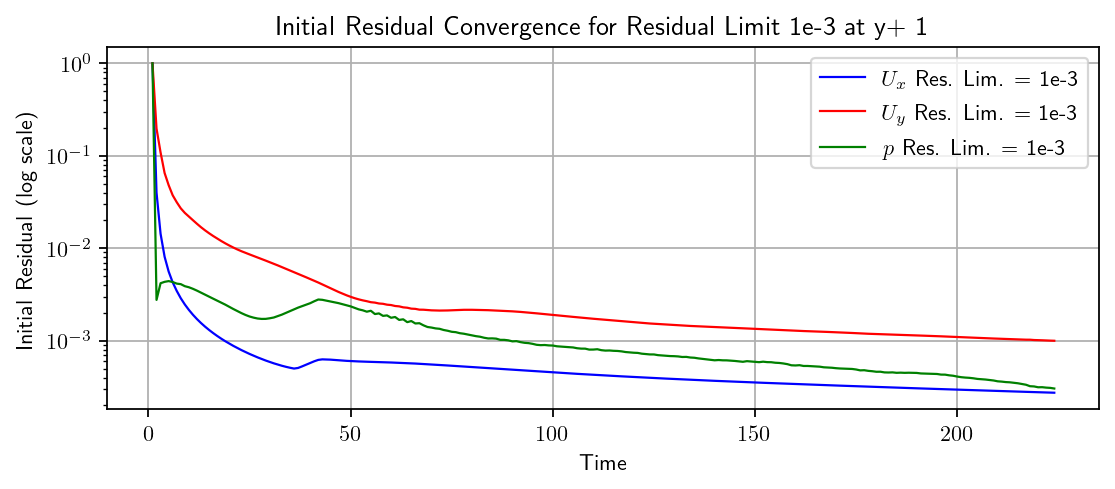

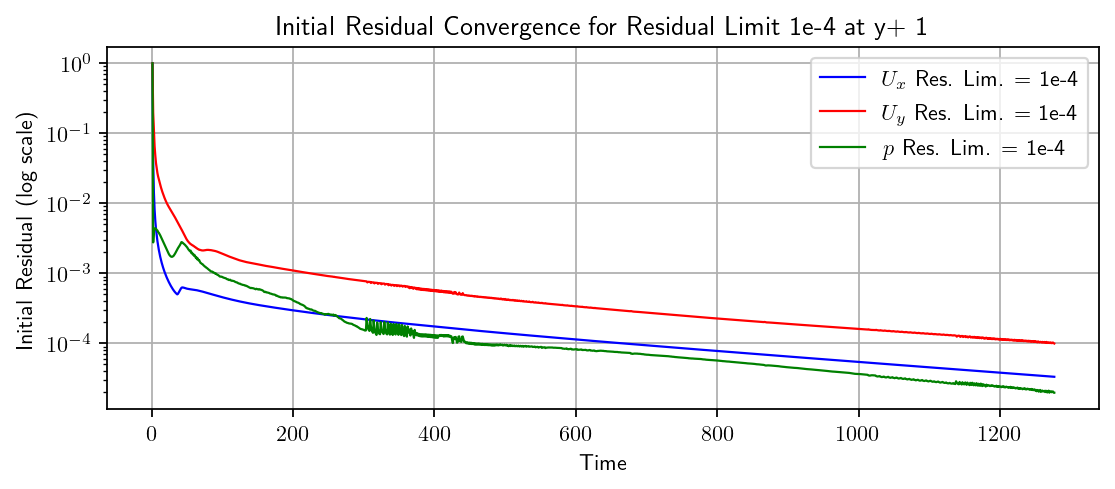

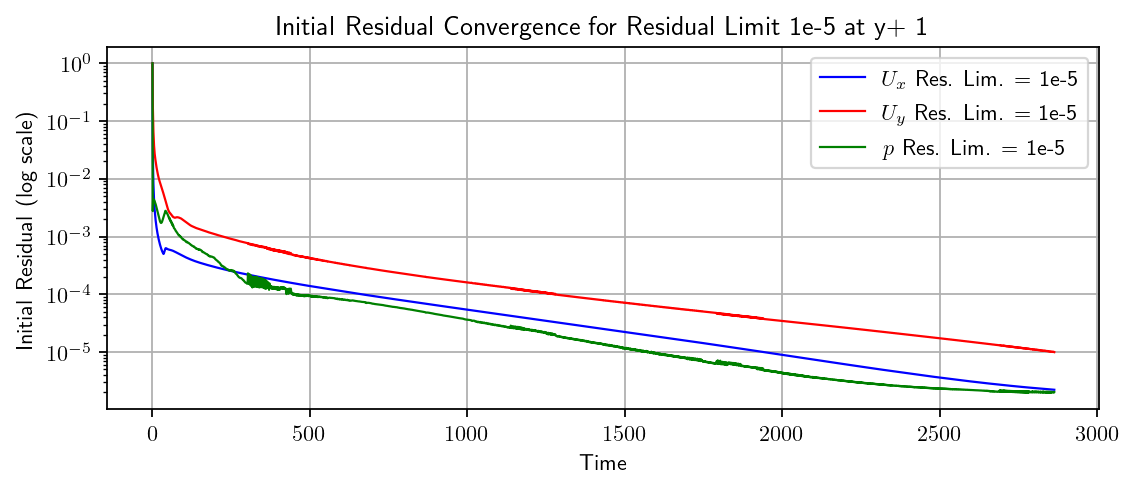

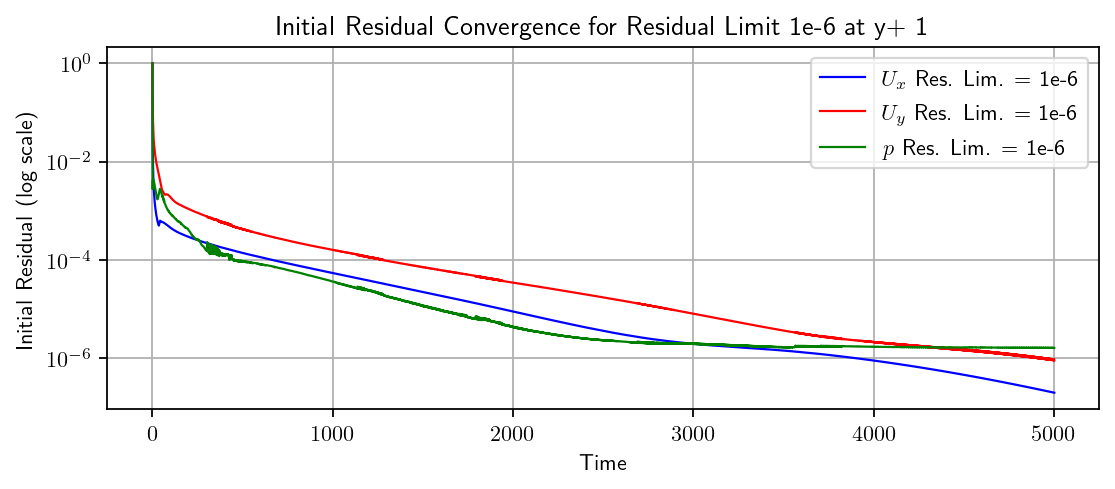

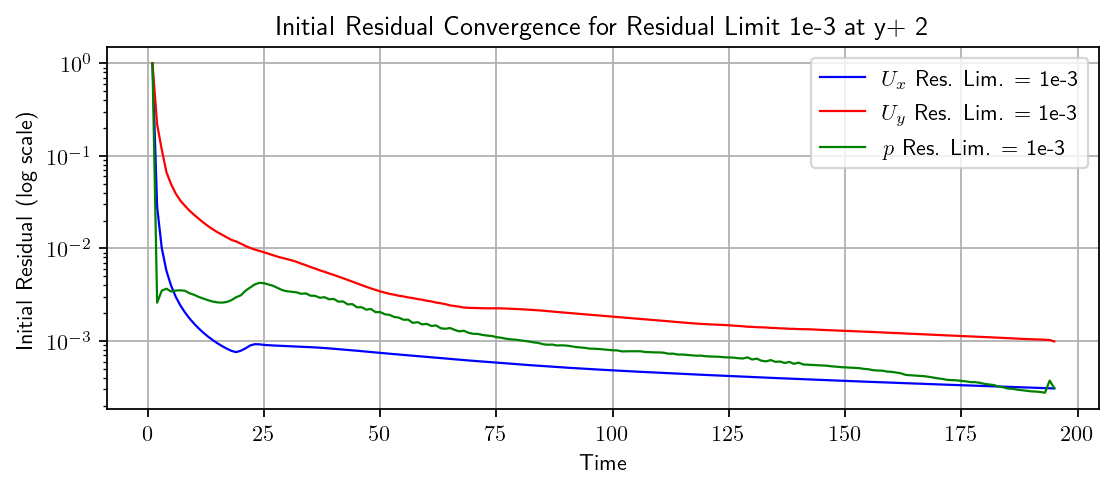

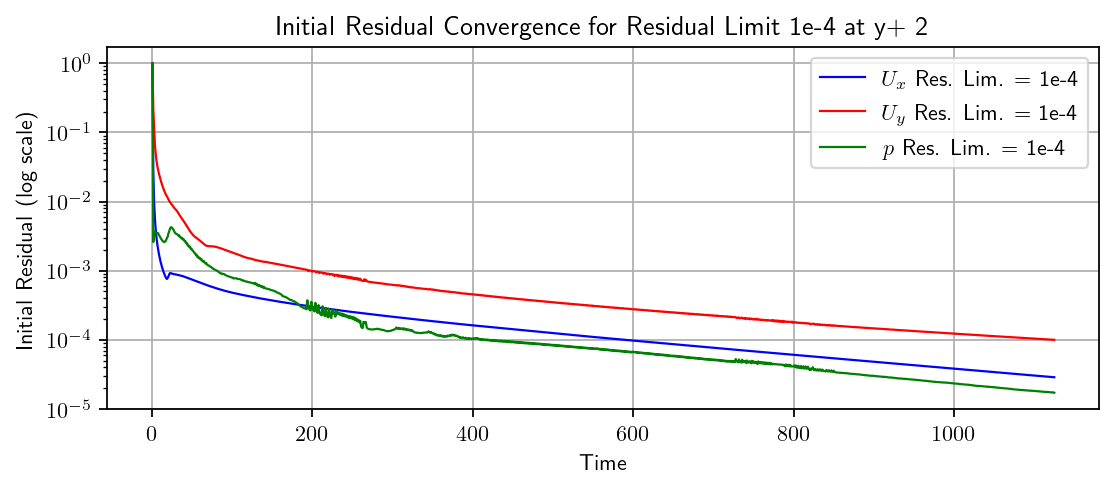

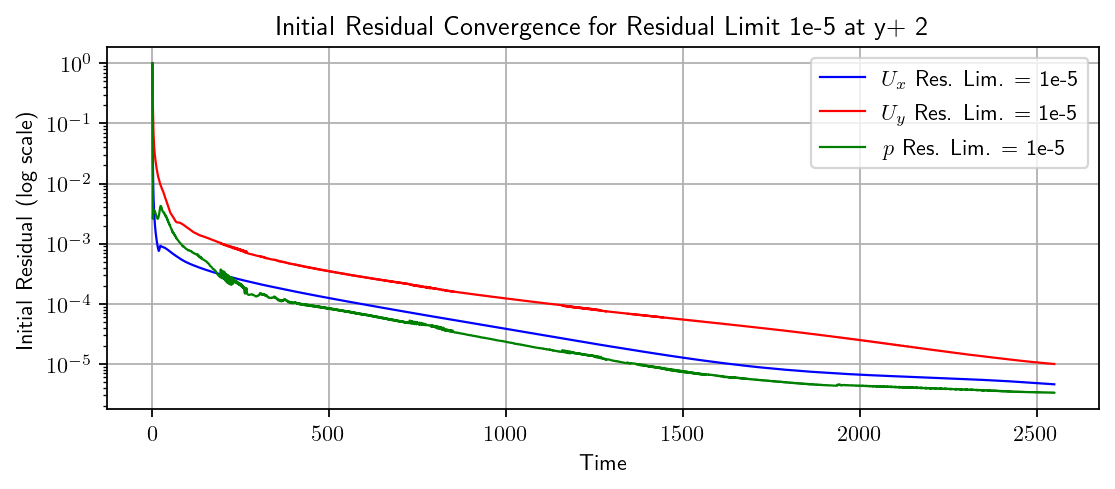

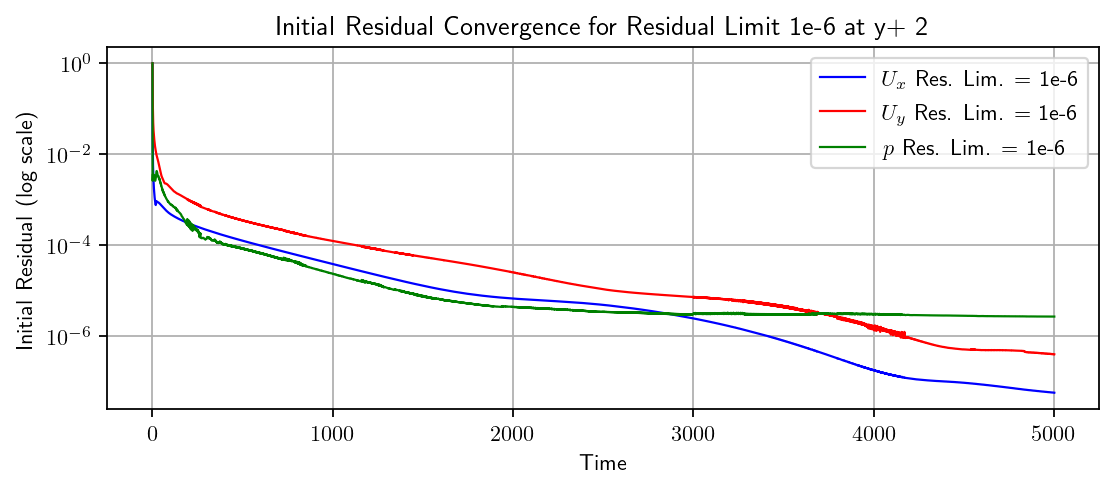

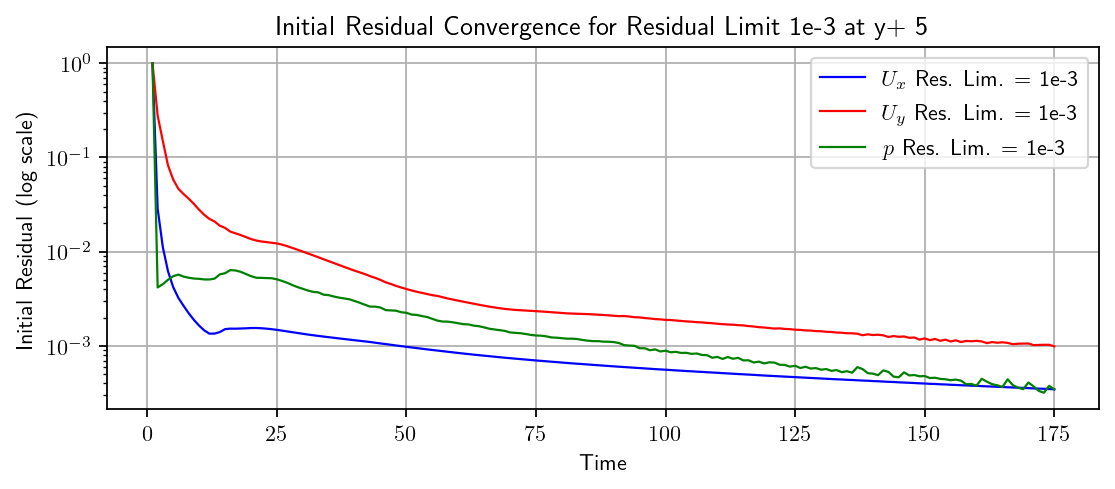

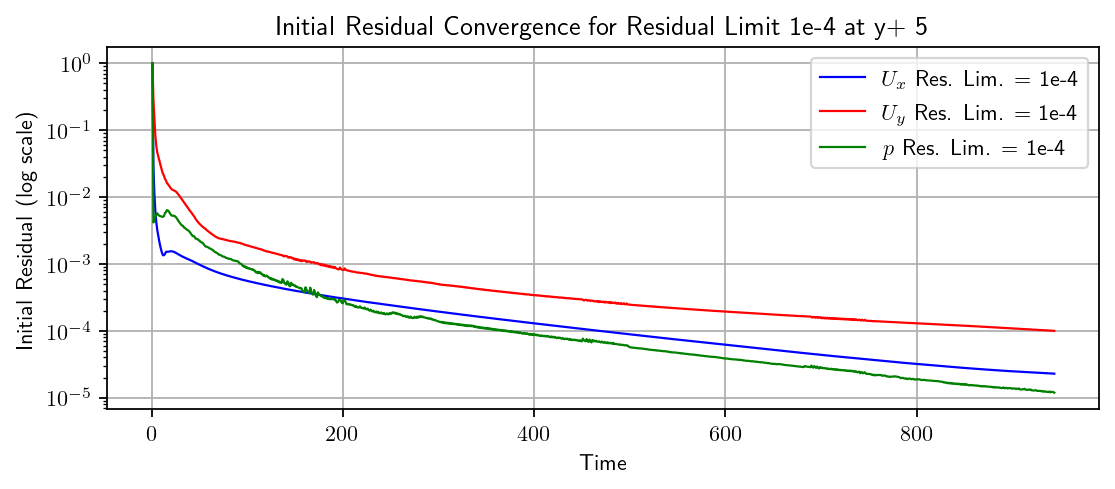

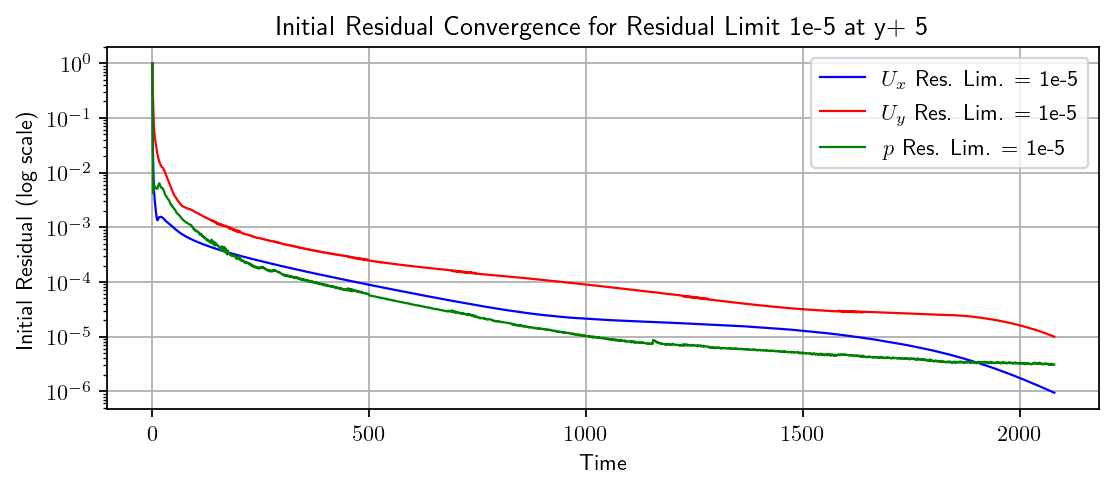

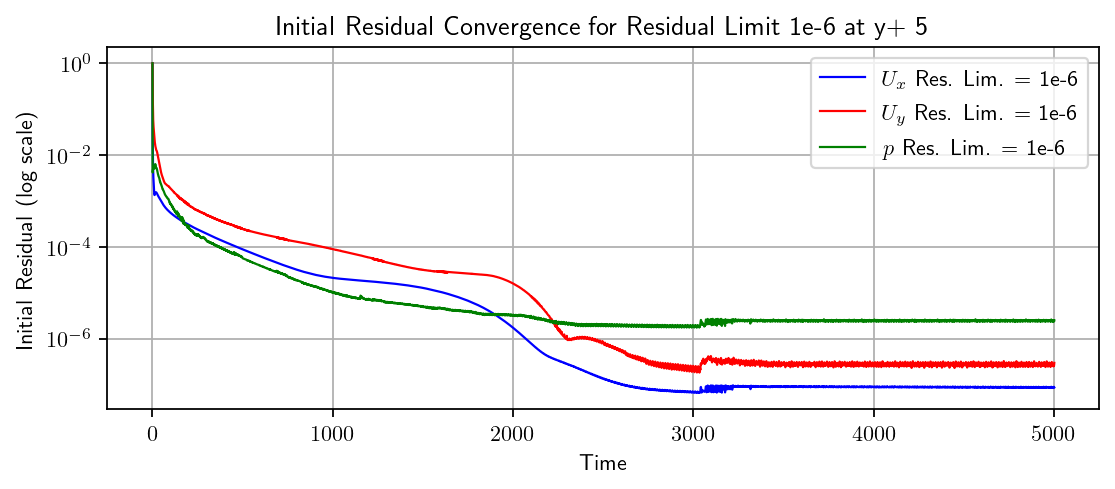

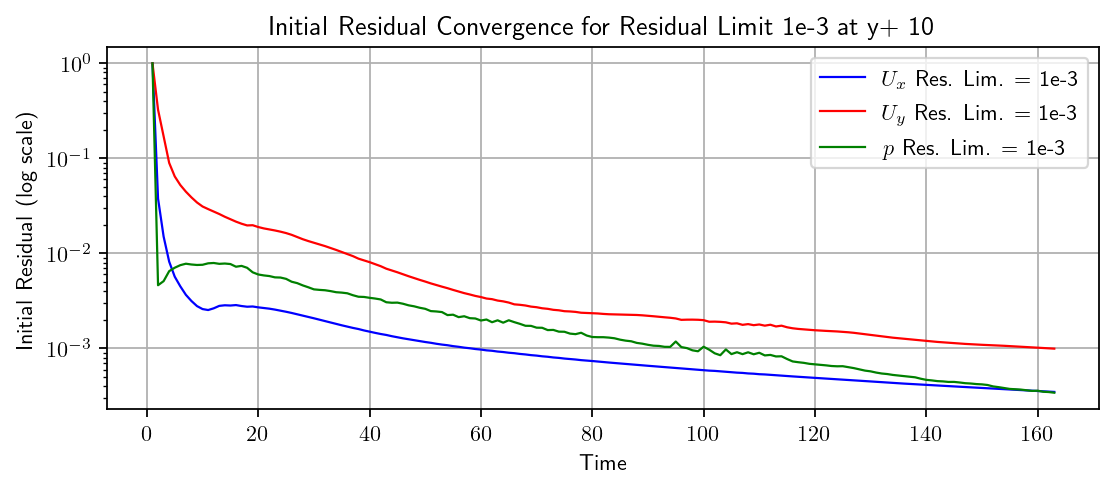

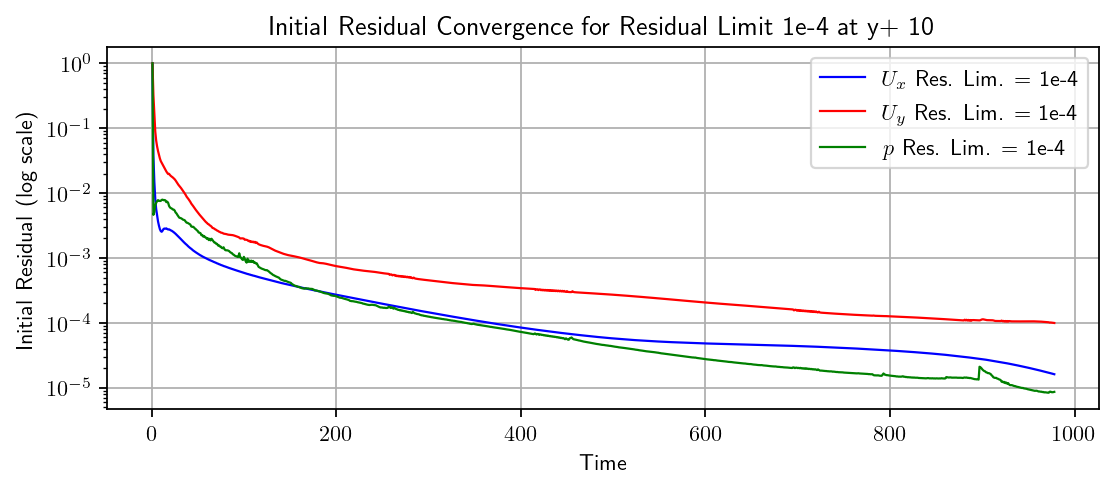

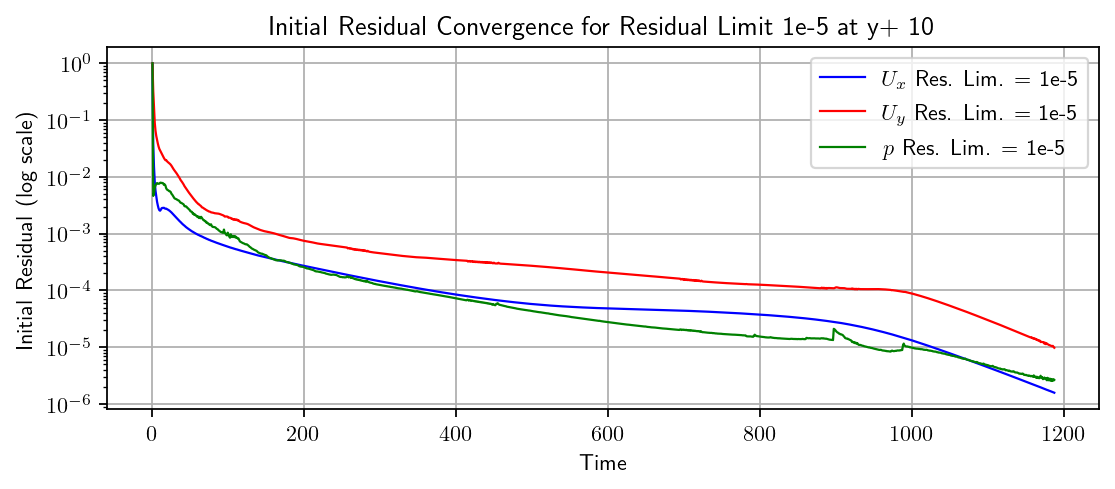

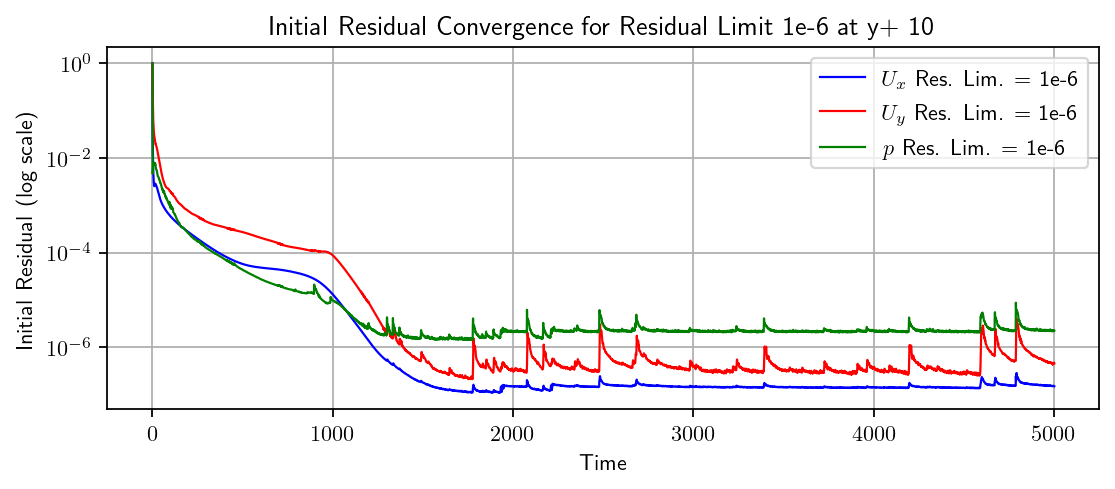

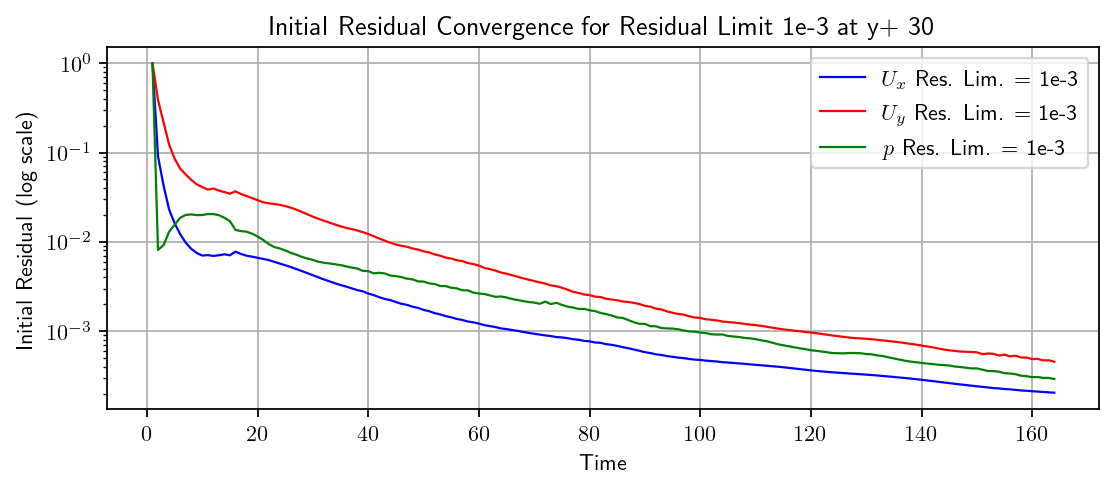

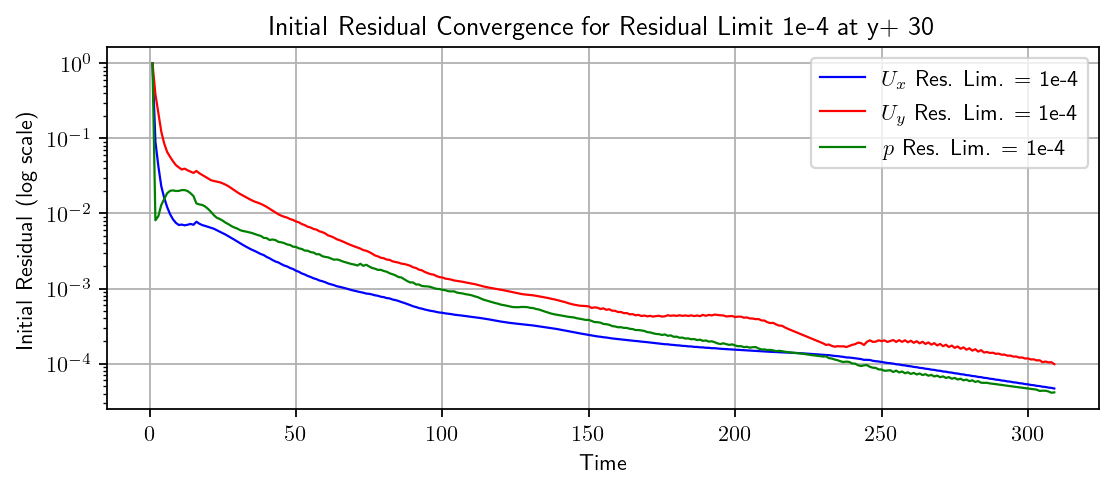

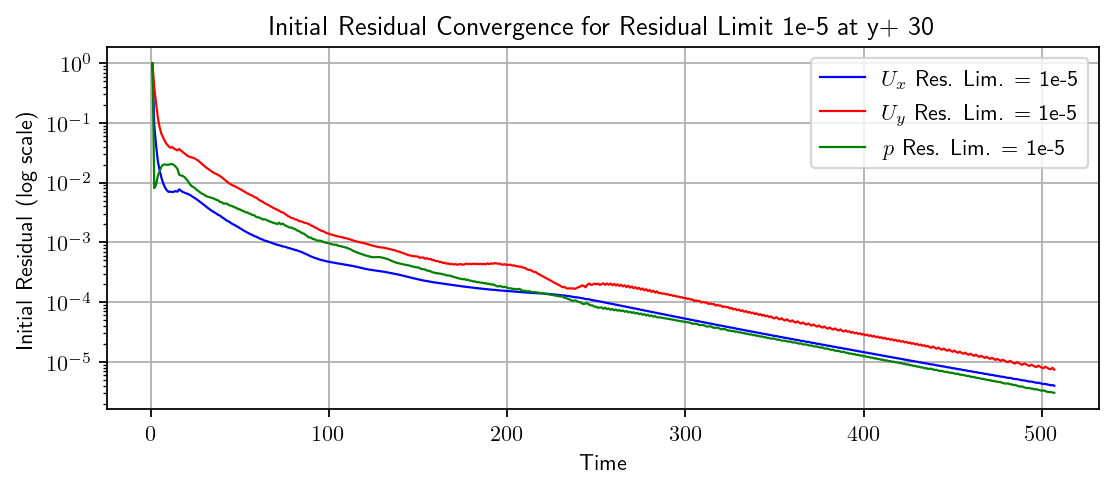

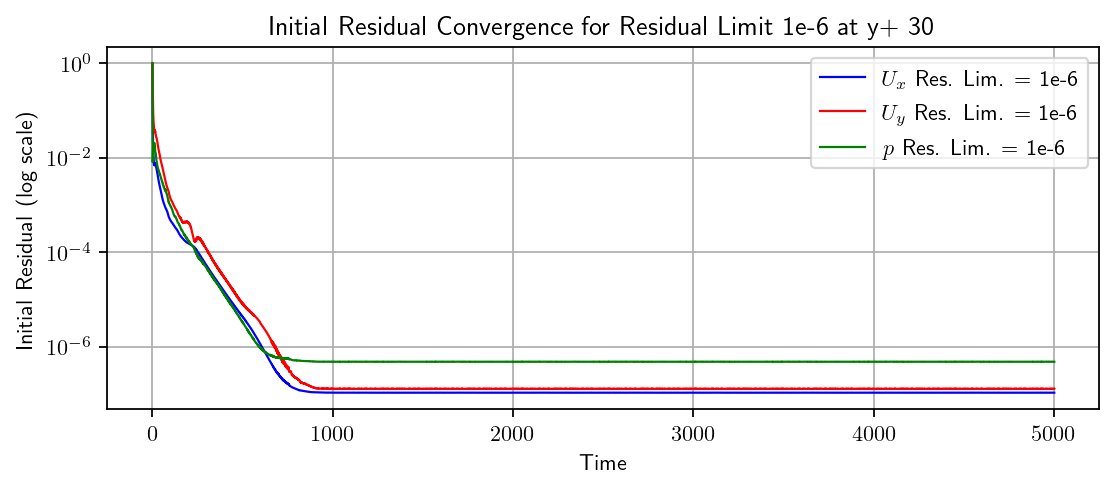

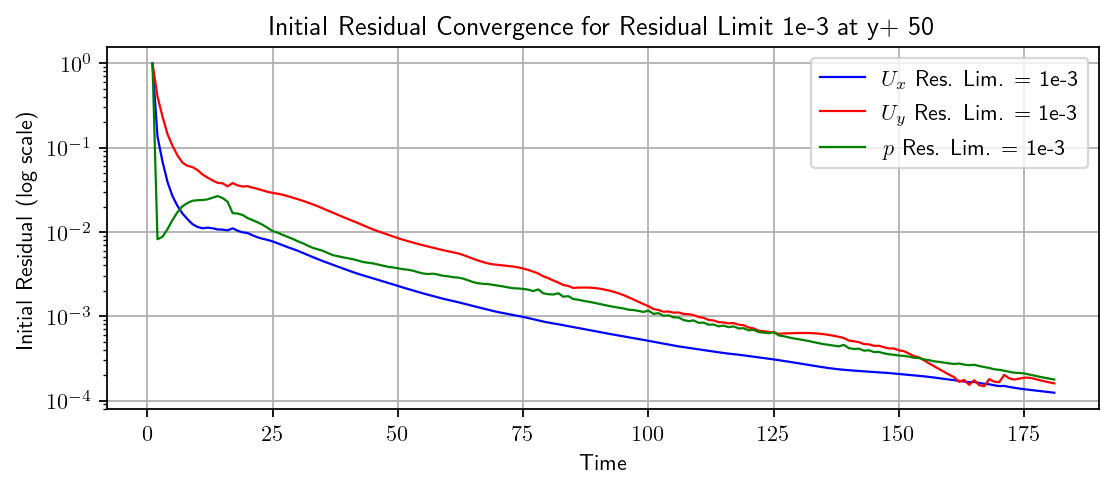

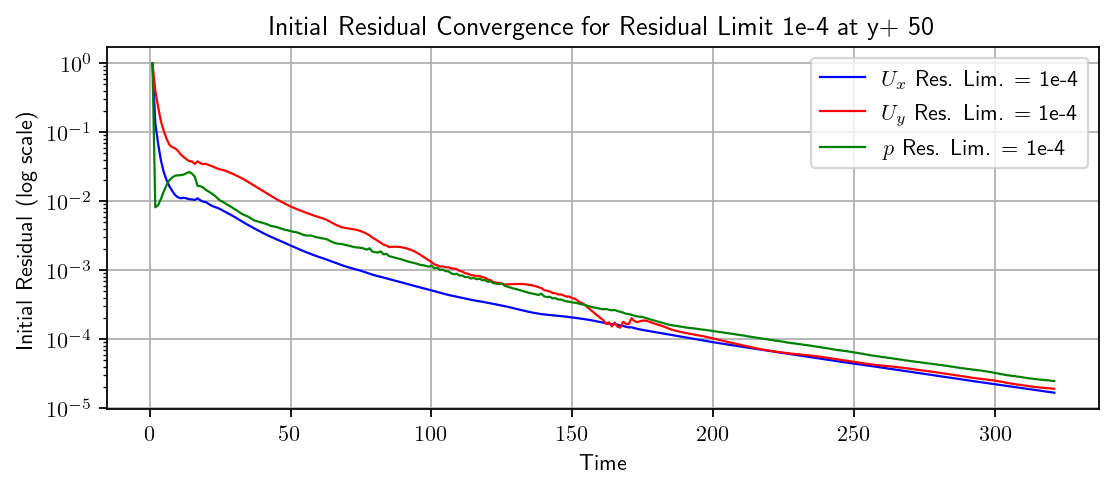

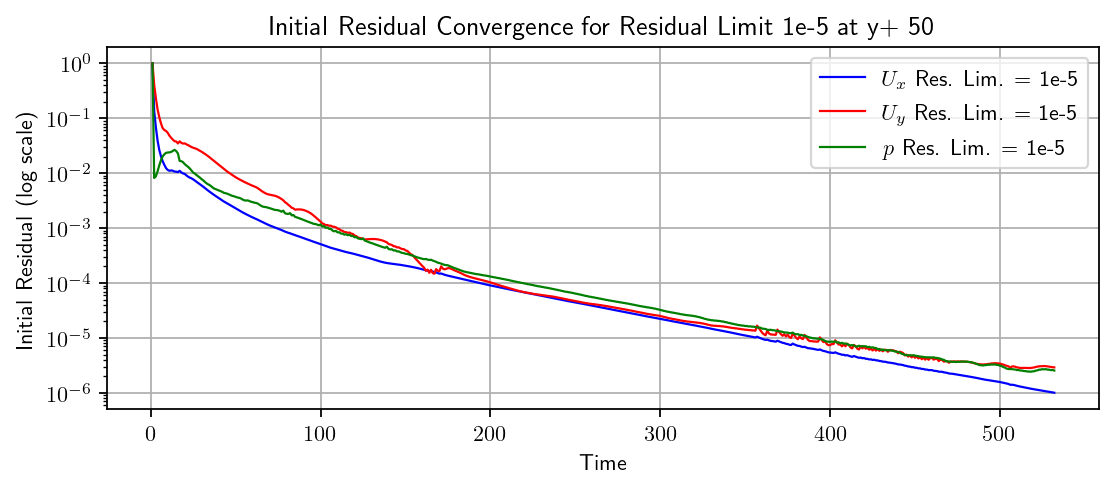

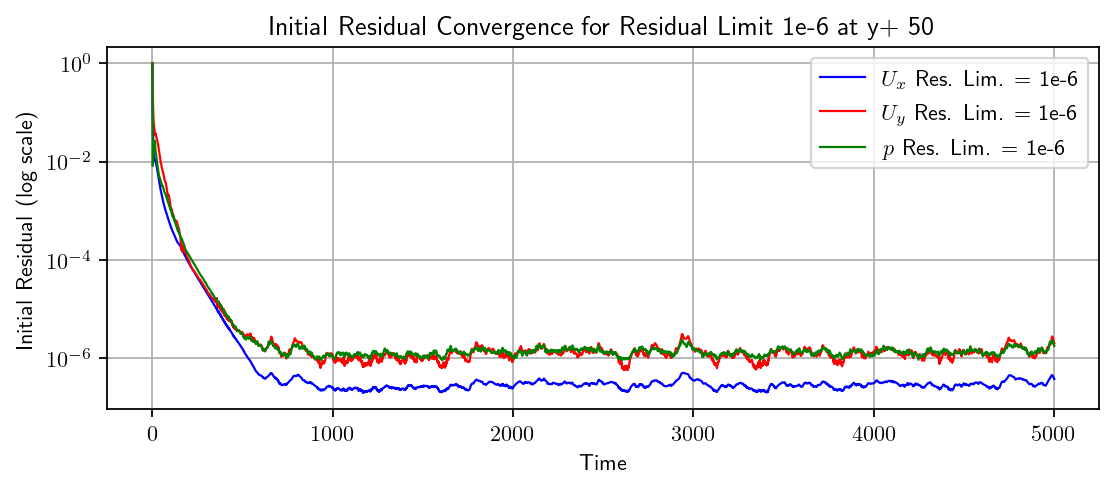

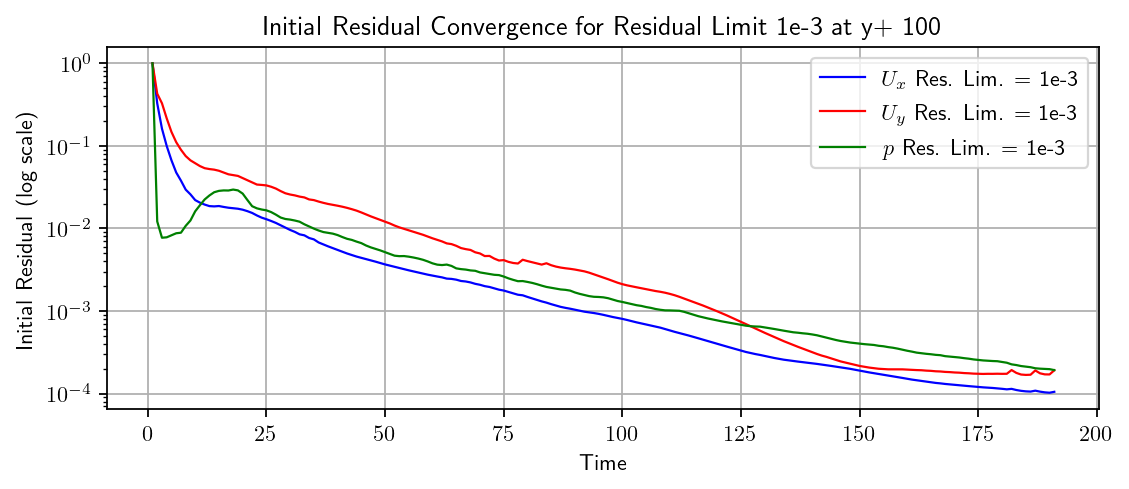

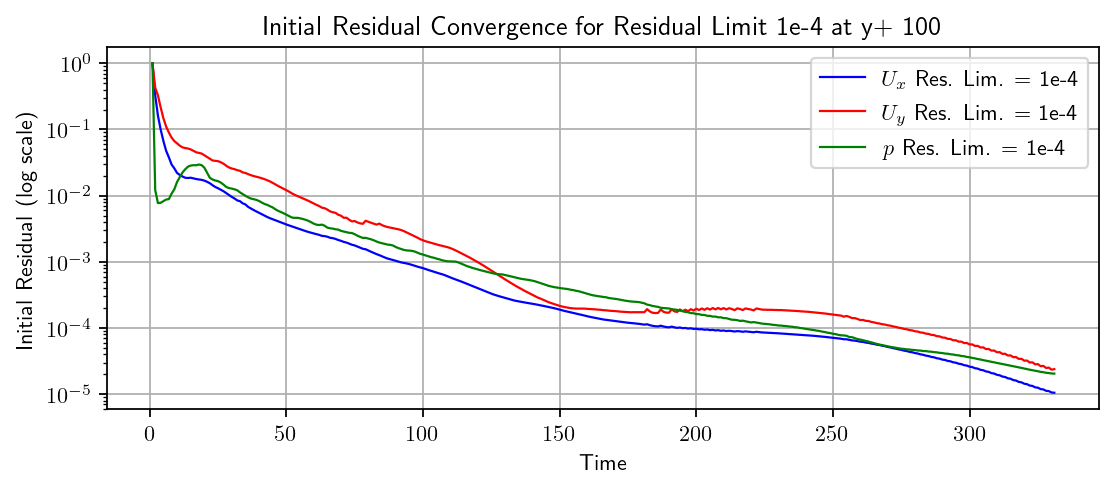

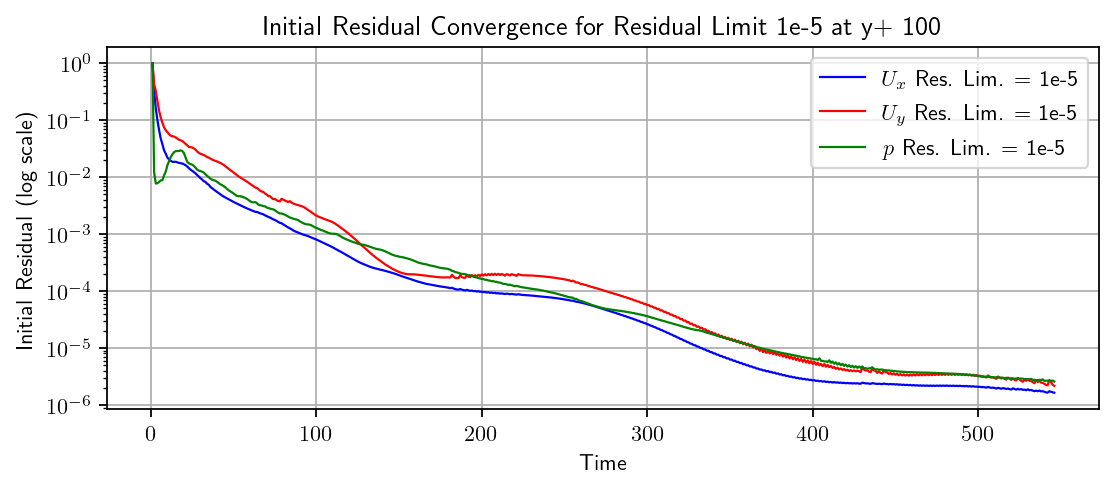

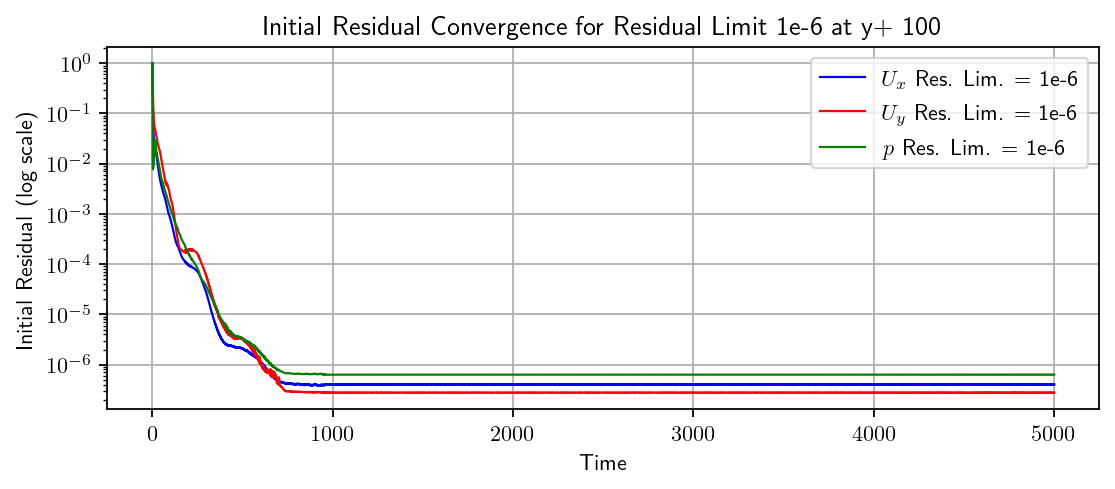

In [5]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for Residual Limit {} at y+ {}".format(res_list[i], yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "$U_x$ Res. Lim. = {}".format(res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "$U_y$ Res. Lim. = {}".format(res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "$p$ Res. Lim. = {}".format(res_list[i]), lw = lw)
        ax.legend()
        plt.savefig(output + "solverInfo_{}_yp{}_{}.pdf".format(model, yp[j], res_list[i]), bbox_inches="tight")